In [1]:
from google.colab import drive
drive.mount('/content/drive')

import tarfile
from bs4 import BeautifulSoup
import numpy as np
import requests
import cv2 #long install, will do later (https://www.quora.com/How-do-I-install-Open-CV2-for-Python-3-6-in-Windows)
import PIL.Image
import urllib

import errno    
import os

from os import listdir
from os.path import isfile, join

from PIL import Image 

#from: https://stackoverflow.com/questions/600268/mkdir-p-functionality-in-python#600612
def mkdir_p(path):
    try:
        os.makedirs(path)
    except OSError as exc:  # Python >2.5
        if exc.errno == errno.EEXIST and os.path.isdir(path):
            pass
        else:
            raise

#code from: https://medium.com/coinmonks/how-to-get-images-from-imagenet-with-python-in-google-colaboratory-aeef5c1c45e5
page = requests.get("http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n04194289")#ship synset
#print(page.content) #commented out, long print
# BeautifulSoup is an HTML parsing library
soup = BeautifulSoup(page.content, 'html.parser')#puts the content of the website into the soup variable, each url on a different line

str_soup=str(soup)#convert soup to string so it can be split
type(str_soup)
split_urls=str_soup.split('\r\n')#split so each url is a different possition on a list
print(len(split_urls))#print the length of the list so you know how many urls you have

bikes_page = requests.get("http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n02834778")#bicycle synset
#print(bikes_page.content) #commented out, long print
# BeautifulSoup is an HTML parsing library
from bs4 import BeautifulSoup
bikes_soup = BeautifulSoup(bikes_page.content, 'html.parser')#puts the content of the website into the soup variable, each url on a different line

bikes_str_soup=str(bikes_soup)#convert soup to string so it can be split
type(bikes_str_soup)
bikes_split_urls=bikes_str_soup.split('\r\n')#split so each url is a different possition on a list
print(len(bikes_split_urls))

#!mkdir /content/train #create the Train folder
mkdir_p("./ImageNet/content/train") #create the Train folder
#!mkdir /content/train/ships #create the ships folder
mkdir_p("./ImageNet/content/train/ships") #create the ships folder
#!mkdir /content/train/bikes #create the bikes folder
mkdir_p("./ImageNet/content/train/bikes") #create the bikes folder
#!mkdir /content/validation
mkdir_p("./ImageNet/content/validation")
#!mkdir /content/validation/ships #create the ships folder
mkdir_p("./ImageNet/content/validation/ships") #create the ships folder
#!mkdir /content/validation/bikes #create the bikes folder
mkdir_p("./ImageNet/content/validation/bikes") #create the bikes folder

img_rows, img_cols = 32, 32 #changed from 32, 32 #number of rows and columns to convert the images to
input_shape = (img_rows, img_cols, 3)#format to store the images (rows, columns, channels) called channels last
def url_to_image(url):
    # download the image, convert it to a NumPy array, and then read
    # it into OpenCV format
    resp = urllib.request.urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
 
    # return the image
    return image
n_of_training_images=500#100#the number of training images to use
for progress in range(n_of_training_images):#store all the images on a directory
    # Print out progress whenever progress is a multiple of 20 so we can follow the
    # (relatively slow) progress
    if(progress%20==0):
        print("Progress (ships):", progress)
    if not split_urls[progress] == None:
        try:
            I = url_to_image(split_urls[progress])
            if (len(I.shape))==3: #check if the image has width, length and channels
                save_path = './ImageNet/content/train/ships/img'+str(progress)+'.jpg'#create a name of each image
                cv2.imwrite(save_path,I)
        except:
            None
#do the same for bikes:
for progress in range(n_of_training_images):#store all the images on a directory
    # Print out progress whenever progress is a multiple of 20 so we can follow the
    # (relatively slow) progress
    if(progress%20==0):
        print("Progress (bikes):", progress)
    if not bikes_split_urls[progress] == None:
        try:
            I = url_to_image(bikes_split_urls[progress])
            if (len(I.shape))==3: #check if the image has width, length and channels
                save_path = './ImageNet/content/train/bikes/img'+str(progress)+'.jpg'#create a name of each image
                cv2.imwrite(save_path,I)
        except:
            None
        
        
#Validation data:
for progress in range(50):#store all the images on a directory
    # Print out progress whenever progress is a multiple of 20 so we can follow the
    # (relatively slow) progress
    if(progress%20==0):
        print("Progress (ships):", progress)
    if not split_urls[progress] == None:
        try:
            I = url_to_image(split_urls[n_of_training_images+progress])#get images that are different from the ones used for training
            if (len(I.shape))==3: #check if the image has width, length and channels
                save_path = './ImageNet/content/validation/ships/img'+str(progress)+'.jpg'#create a name of each image
                cv2.imwrite(save_path,I)
        except:
            None
#do the same for bikes:
for progress in range(50):#store all the images on a directory
    # Print out progress whenever progress is a multiple of 20 so we can follow the
    # (relatively slow) progress
    if(progress%20==0):
        print("Progress (bikes):", progress)
    if not bikes_split_urls[progress] == None:
        try:
            I = url_to_image(bikes_split_urls[n_of_training_images+progress])#get images that are different from the ones used for training
            if (len(I.shape))==3: #check if the image has width, length and channels
                save_path = './ImageNet/content/validation/bikes/img'+str(progress)+'.jpg'#create a name of each image
                cv2.imwrite(save_path,I)
        except:
            None
        
print("\nTRAIN:\n")          
#print("\nlist the files inside ships directory:\n")        
#!ls /content/train/ships #list the files inside ships
mypath = "./ImageNet/content/train/ships"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
print("%s: "%(mypath), onlyfiles)
#print("\nlist the files inside bikes directory:\n")
#!ls /content/train/bikes #list the files inside bikes
mypath = "./ImageNet/content/train/bikes"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
print("%s: "%(mypath), onlyfiles)
print("\nVALIDATION:\n")
#print("\nlist the files inside ships directory:\n")        
#!ls /content/validation/ships #list the files inside ships
mypath = "./ImageNet/content/validation/ships"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
print("%s: "%(mypath), onlyfiles)
#print("\nlist the files inside bikes directory:\n")
#!ls /content/validation/bikes #list the files inside bikes
mypath = "./ImageNet/content/validation/bikes"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
print("%s: "%(mypath), onlyfiles)

img = Image.open("./ImageNet/content/validation/bikes/" + onlyfiles[0])
img.show()

#from: http://www.image-net.org/api/text/imagenet.synset.obtain_synset_list
#first entry for a future test: n02119789

#from: https://stackoverflow.com/questions/15859089/get-the-directory-structure-of-a-tgz-file-in-python#15859216
#this is not yet accomplishing my goal (to read all ImageNet url entries)
##tar = tarfile.open("ImageNet/imagenet_fall11_urls.tgz")
##i = 0
##for file in tar.getmembers():
##    print(file.name) #print "fall11_urls.txt"
##    nested_file = tarfile.open(file.name)
##    #^ERROR: FileNotFoundError: [Errno 2] No such file or directory: 'fall11_urls.txt'
##    for url in nested_file.getmembers():
##        print(url.name)
##        if i > 3:
##            brake
##        i += 1

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
1262
1345
Progress (ships): 0
Progress (ships): 20
Progress (ships): 40
Progress (ships): 60
Progress (ships): 80
Progress (ships): 100
Progress (ships): 120
Progress (ships): 140
Progress (ships): 160
Progress (ships): 180
Progress (ships): 200
Progress (ships): 220
Progress (ships): 240
Progress (ships): 260
Progress (ships): 280
Progress (ships): 300
Progress (ships): 320
Progress (ships): 340
Progress (ships): 360
Progress (ships): 380
Progress (ships): 40

Random Seed:  999
Generator(
  (convT1): Sequential(
    (0): ConvTranspose2d(196, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (convT2): Sequential(
    (0): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (convT3): Sequential(
    (0): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (convT4): Sequential(
    (0): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (output): Sequential(
    (0): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  )
)


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


[0/15][0/11]	Loss_XZ: 5.8720	Loss_E: 0.7859	Loss_G: 0.8536


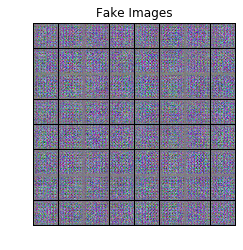

checkpoint created.(check google drive)
checkpoint created.(check google drive)
[1/15][0/11]	Loss_XZ: 5.1650	Loss_E: 0.8993	Loss_G: 1.3107
checkpoint created.(check google drive)
[2/15][0/11]	Loss_XZ: 2.6312	Loss_E: 2.1912	Loss_G: 4.6065
checkpoint created.(check google drive)
[3/15][0/11]	Loss_XZ: 1.9201	Loss_E: 2.1300	Loss_G: 6.2327
checkpoint created.(check google drive)
[4/15][0/11]	Loss_XZ: 1.8726	Loss_E: 1.7383	Loss_G: 5.4294


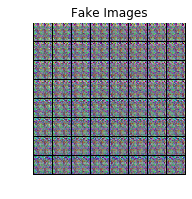

checkpoint created.(check google drive)
[5/15][0/11]	Loss_XZ: 1.9551	Loss_E: 1.4411	Loss_G: 4.8491
checkpoint created.(check google drive)
[6/15][0/11]	Loss_XZ: 1.2740	Loss_E: 1.6622	Loss_G: 8.5600
checkpoint created.(check google drive)
[7/15][0/11]	Loss_XZ: 1.1296	Loss_E: 1.5944	Loss_G: 8.4544
checkpoint created.(check google drive)
[8/15][0/11]	Loss_XZ: 1.9048	Loss_E: 4.2315	Loss_G: 12.8246
checkpoint created.(check google drive)
[9/15][0/11]	Loss_XZ: 0.8859	Loss_E: 2.2426	Loss_G: 8.3072


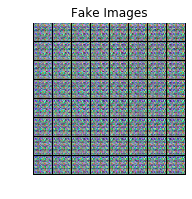

checkpoint created.(check google drive)
[10/15][0/11]	Loss_XZ: 1.5165	Loss_E: 0.3076	Loss_G: 6.6948
checkpoint created.(check google drive)
checkpoint created.(check google drive)
[11/15][0/11]	Loss_XZ: 3.1516	Loss_E: 0.2232	Loss_G: 4.7605
checkpoint created.(check google drive)
[12/15][0/11]	Loss_XZ: 3.3948	Loss_E: 0.5570	Loss_G: 4.0037
checkpoint created.(check google drive)
[13/15][0/11]	Loss_XZ: 1.6341	Loss_E: 1.8703	Loss_G: 4.8675


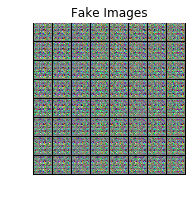

checkpoint created.(check google drive)
[14/15][0/11]	Loss_XZ: 3.4001	Loss_E: 0.6511	Loss_G: 2.7464
checkpoint created.(check google drive)


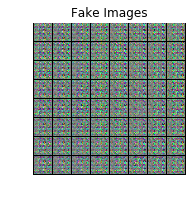

checkpoint created.(check google drive)
[15/15][0/11]	Loss_XZ: 3.8948	Loss_E: 0.6333	Loss_G: 2.9197
checkpoint created.(check google drive)
[16/15][0/11]	Loss_XZ: 3.4046	Loss_E: 0.8609	Loss_G: 3.3272
checkpoint created.(check google drive)
[17/15][0/11]	Loss_XZ: 3.7907	Loss_E: 1.1440	Loss_G: 2.6701
checkpoint created.(check google drive)
[18/15][0/11]	Loss_XZ: 3.8636	Loss_E: 1.3269	Loss_G: 2.4659


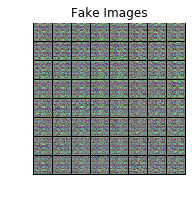

checkpoint created.(check google drive)
[19/15][0/11]	Loss_XZ: 3.4002	Loss_E: 2.0155	Loss_G: 3.0990
checkpoint created.(check google drive)
[20/15][0/11]	Loss_XZ: 3.3933	Loss_E: 2.8861	Loss_G: 3.4340
checkpoint created.(check google drive)
checkpoint created.(check google drive)
[21/15][0/11]	Loss_XZ: 3.1680	Loss_E: 3.3294	Loss_G: 3.5134
checkpoint created.(check google drive)
[22/15][0/11]	Loss_XZ: 2.8348	Loss_E: 3.0393	Loss_G: 3.5704


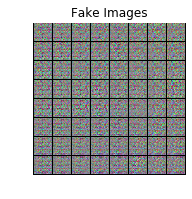

checkpoint created.(check google drive)
[23/15][0/11]	Loss_XZ: 2.4992	Loss_E: 3.2885	Loss_G: 3.9155
checkpoint created.(check google drive)
[24/15][0/11]	Loss_XZ: 2.1863	Loss_E: 3.4805	Loss_G: 4.2309
checkpoint created.(check google drive)
[25/15][0/11]	Loss_XZ: 2.0636	Loss_E: 3.5345	Loss_G: 4.3593
checkpoint created.(check google drive)
[26/15][0/11]	Loss_XZ: 2.0412	Loss_E: 3.9158	Loss_G: 4.4427
checkpoint created.(check google drive)
[27/15][0/11]	Loss_XZ: 2.0341	Loss_E: 4.1697	Loss_G: 4.3928


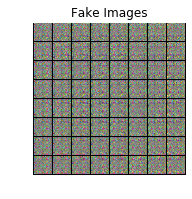

checkpoint created.(check google drive)
[28/15][0/11]	Loss_XZ: 1.9381	Loss_E: 4.4472	Loss_G: 4.5390
checkpoint created.(check google drive)
[29/15][0/11]	Loss_XZ: 1.8698	Loss_E: 4.7429	Loss_G: 4.6078
checkpoint created.(check google drive)
[30/15][0/11]	Loss_XZ: 1.8767	Loss_E: 5.0135	Loss_G: 4.5787
checkpoint created.(check google drive)
checkpoint created.(check google drive)
[31/15][0/11]	Loss_XZ: 1.9366	Loss_E: 5.0928	Loss_G: 4.6234


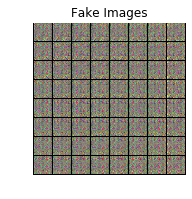

checkpoint created.(check google drive)
[32/15][0/11]	Loss_XZ: 1.9651	Loss_E: 5.2461	Loss_G: 4.4951
checkpoint created.(check google drive)
[33/15][0/11]	Loss_XZ: 1.7719	Loss_E: 5.4881	Loss_G: 4.7661
checkpoint created.(check google drive)
[34/15][0/11]	Loss_XZ: 1.6431	Loss_E: 5.7553	Loss_G: 4.8557
checkpoint created.(check google drive)
[35/15][0/11]	Loss_XZ: 1.4581	Loss_E: 5.9135	Loss_G: 4.9821
checkpoint created.(check google drive)
[36/15][0/11]	Loss_XZ: 1.4437	Loss_E: 6.0089	Loss_G: 5.1088


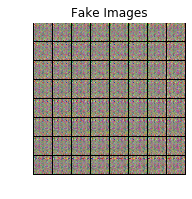

checkpoint created.(check google drive)
[37/15][0/11]	Loss_XZ: 1.3308	Loss_E: 6.1169	Loss_G: 5.3363
checkpoint created.(check google drive)
[38/15][0/11]	Loss_XZ: 0.8288	Loss_E: 6.4472	Loss_G: 6.1607
checkpoint created.(check google drive)
[39/15][0/11]	Loss_XZ: 0.7248	Loss_E: 6.2838	Loss_G: 6.1883
checkpoint created.(check google drive)
[40/15][0/11]	Loss_XZ: 0.7887	Loss_E: 6.0861	Loss_G: 6.0370
checkpoint created.(check google drive)


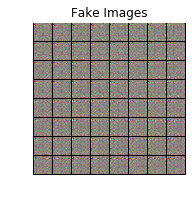

checkpoint created.(check google drive)
[41/15][0/11]	Loss_XZ: 0.8624	Loss_E: 5.8993	Loss_G: 5.8690
checkpoint created.(check google drive)
[42/15][0/11]	Loss_XZ: 1.0260	Loss_E: 5.7327	Loss_G: 5.6758
checkpoint created.(check google drive)
[43/15][0/11]	Loss_XZ: 1.1501	Loss_E: 5.5566	Loss_G: 5.5415
checkpoint created.(check google drive)
[44/15][0/11]	Loss_XZ: 0.8309	Loss_E: 5.5078	Loss_G: 6.2630
checkpoint created.(check google drive)
[45/15][0/11]	Loss_XZ: 0.7139	Loss_E: 5.9071	Loss_G: 6.9177


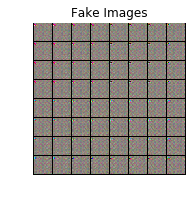

checkpoint created.(check google drive)
[46/15][0/11]	Loss_XZ: 0.7107	Loss_E: 5.6357	Loss_G: 6.5722
checkpoint created.(check google drive)
[47/15][0/11]	Loss_XZ: 0.7129	Loss_E: 5.4982	Loss_G: 6.3433
checkpoint created.(check google drive)
[48/15][0/11]	Loss_XZ: 0.7148	Loss_E: 5.4885	Loss_G: 6.4016
checkpoint created.(check google drive)
[49/15][0/11]	Loss_XZ: 0.7105	Loss_E: 5.4510	Loss_G: 6.3570
checkpoint created.(check google drive)
[50/15][0/11]	Loss_XZ: 0.7201	Loss_E: 5.5220	Loss_G: 6.4851


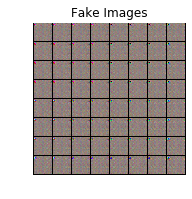

checkpoint created.(check google drive)
checkpoint created.(check google drive)
[51/15][0/11]	Loss_XZ: 0.6937	Loss_E: 5.3828	Loss_G: 6.4763
checkpoint created.(check google drive)
[52/15][0/11]	Loss_XZ: 0.6971	Loss_E: 5.2653	Loss_G: 6.5138
checkpoint created.(check google drive)
[53/15][0/11]	Loss_XZ: 0.7020	Loss_E: 5.1889	Loss_G: 6.5287
checkpoint created.(check google drive)
[54/15][0/11]	Loss_XZ: 0.7092	Loss_E: 5.0668	Loss_G: 6.4215


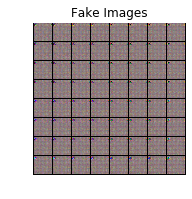

checkpoint created.(check google drive)
[55/15][0/11]	Loss_XZ: 0.6934	Loss_E: 4.9942	Loss_G: 6.5207
checkpoint created.(check google drive)
[56/15][0/11]	Loss_XZ: 0.6946	Loss_E: 4.8165	Loss_G: 6.3790
checkpoint created.(check google drive)
[57/15][0/11]	Loss_XZ: 0.6976	Loss_E: 4.6624	Loss_G: 6.4337
checkpoint created.(check google drive)
[58/15][0/11]	Loss_XZ: 0.6938	Loss_E: 4.8901	Loss_G: 6.9025
checkpoint created.(check google drive)
[59/15][0/11]	Loss_XZ: 0.6954	Loss_E: 4.5431	Loss_G: 6.6400


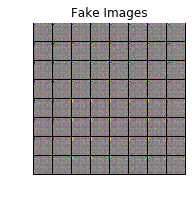

checkpoint created.(check google drive)
[60/15][0/11]	Loss_XZ: 0.6985	Loss_E: 4.4966	Loss_G: 6.6356
checkpoint created.(check google drive)
checkpoint created.(check google drive)
[61/15][0/11]	Loss_XZ: 0.6934	Loss_E: 4.5780	Loss_G: 6.8230
checkpoint created.(check google drive)
[62/15][0/11]	Loss_XZ: 0.6998	Loss_E: 5.1628	Loss_G: 7.4321
checkpoint created.(check google drive)
[63/15][0/11]	Loss_XZ: 0.6955	Loss_E: 5.6463	Loss_G: 7.7593


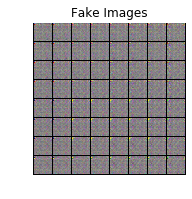

checkpoint created.(check google drive)
[64/15][0/11]	Loss_XZ: 0.6945	Loss_E: 5.4185	Loss_G: 7.0741
checkpoint created.(check google drive)
[65/15][0/11]	Loss_XZ: 0.7053	Loss_E: 5.6368	Loss_G: 7.6977
checkpoint created.(check google drive)
[66/15][0/11]	Loss_XZ: 0.7030	Loss_E: 5.9050	Loss_G: 7.8788
checkpoint created.(check google drive)
[67/15][0/11]	Loss_XZ: 0.6984	Loss_E: 5.6448	Loss_G: 7.3814
checkpoint created.(check google drive)
[68/15][0/11]	Loss_XZ: 0.7172	Loss_E: 5.2674	Loss_G: 6.9488


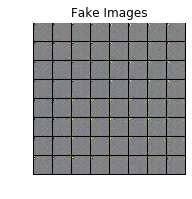

checkpoint created.(check google drive)
[69/15][0/11]	Loss_XZ: 0.6952	Loss_E: 5.0060	Loss_G: 6.5754
checkpoint created.(check google drive)
[70/15][0/11]	Loss_XZ: 0.7029	Loss_E: 5.7780	Loss_G: 7.5877
checkpoint created.(check google drive)
checkpoint created.(check google drive)
[71/15][0/11]	Loss_XZ: 0.7057	Loss_E: 5.6334	Loss_G: 7.1417
checkpoint created.(check google drive)
[72/15][0/11]	Loss_XZ: 0.7047	Loss_E: 5.4219	Loss_G: 6.5828


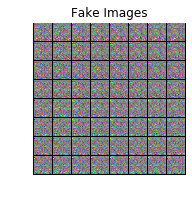

checkpoint created.(check google drive)
[73/15][0/11]	Loss_XZ: 0.7122	Loss_E: 7.3951	Loss_G: 7.6813
checkpoint created.(check google drive)
[74/15][0/11]	Loss_XZ: 0.7178	Loss_E: 9.0557	Loss_G: 7.1890
checkpoint created.(check google drive)
[75/15][0/11]	Loss_XZ: 0.7067	Loss_E: 12.3070	Loss_G: 6.7030
checkpoint created.(check google drive)
[76/15][0/11]	Loss_XZ: 0.6940	Loss_E: 13.9253	Loss_G: 6.6602
checkpoint created.(check google drive)
[77/15][0/11]	Loss_XZ: 0.6950	Loss_E: 13.5982	Loss_G: 6.7720


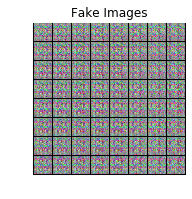

checkpoint created.(check google drive)
[78/15][0/11]	Loss_XZ: 0.7022	Loss_E: 15.6270	Loss_G: 8.2821
checkpoint created.(check google drive)
[79/15][0/11]	Loss_XZ: 0.6945	Loss_E: 20.6931	Loss_G: 8.1703
checkpoint created.(check google drive)
[80/15][0/11]	Loss_XZ: 0.6931	Loss_E: 25.0822	Loss_G: 7.8498
checkpoint created.(check google drive)
checkpoint created.(check google drive)
[81/15][0/11]	Loss_XZ: 0.6931	Loss_E: 27.6310	Loss_G: 8.4129


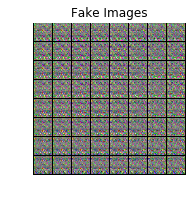

checkpoint created.(check google drive)
[82/15][0/11]	Loss_XZ: 0.6931	Loss_E: 27.6310	Loss_G: 71.9237
checkpoint created.(check google drive)
[83/15][0/11]	Loss_XZ: 0.6936	Loss_E: 27.6310	Loss_G: 72.8737


Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/queues.py", line 240, in _feed
    send_bytes(obj)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/queues.py", line 240, in _feed
    send_bytes(obj)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, b

KeyboardInterrupt: ignored

In [3]:
from __future__ import print_function
#%matplotlib inline
import argparse
import os
import random
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.nn.functional as F
import torch.backends.cudnn as cudnn
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

#base code building DCGAN from AISC GAN Workshop

#--Choose GAN type--
DCGAN = False #change to 'False' for BigBiGAN
if not DCGAN:
  BigBiGAN = True #changed to else statment, so only checking if DCGAN T/F to pick BigBiGAN atm
else:
  BigBiGAN = False

# Set random seem for reproducibility
manualSeed = 999
#manualSeed = random.randint(1, 10000) # use if you want new results
print("Random Seed: ", manualSeed)
random.seed(manualSeed)
torch.manual_seed(manualSeed)

# Root directory for dataset
dataroot = "./ImageNet/content/train"#/ships" #'/content/drive/My Drive/gans_workshop/fonts/sheets'
#cutting off '/ships' seems to have solved the "no files found error, wierd... but explained by this post:
#https://stackoverflow.com/questions/54613573/runtimeerror-found-0-files-in-subfolders-of-error-about-subfolder-in-pytor

# Number of workers for dataloader
workers = 4#0 #had to change to zero for running locally
#setting workers to 0 seems to have fixed the "RuntimeError: DataLoader worker (pid(s) [bla bla]) exited unexpectedly"
# fix from here: https://github.com/pytorch/pytorch/issues/5301

# Batch size during training
batch_size = 64

# Spatial size of training images. All images will be resized to this
#   size using a transformer.
image_size = 64

# Number of channels in the training images. For color images this is 3
nc = 3

# Size of z latent vector (i.e. size of generator input)
if DCGAN:
  nz = 100
else: #BigBiGAN
  nz = 196

# Size of feature maps in generator
ngf = 64

# Size of feature maps in discriminator
ndf = 64

# Number of training epochs
num_epochs = 15#5

# Learning rate for optimizers
lr = 0.0002

# Beta1 hyperparam for Adam optimizers
beta1 = 0.5

# Number of GPUs available. Use 0 for CPU mode.
ngpu = 1

# Size of feature maps in Linear discriminators
#channels = # may use this later when I switch to dims * dims

# H (unary: E(x), z) Linear discriminator dims
h_input_size = 196    
h_hidden_size = 196
h_output_size = 196

# J joint (xz) Discriminator dims
j_input_size = 392
j_hidden_size = 392
j_output_size = 392

# F score S_x(F(X))
Sx_input_size = 196
Sx_hidden_size = 98
Sx_output_size = 1

# H score S_z(H(Z))
Sz_input_size = 196
Sz_hidden_size = 98
Sz_output_size = 1

# J score S_xz(J(F(X), H(Z)))
Sxz_input_size = 392
Sxz_hidden_size = 196
Sxz_output_size = 1

# We can use an image folder dataset the way we have it setup.
# Create the dataset
dataset = dset.ImageFolder(root=dataroot,
                           transform=transforms.Compose([
                               transforms.Resize(image_size),
                               transforms.CenterCrop(image_size),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                           ]))
# Create the dataloader
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                         shuffle=True, num_workers=workers)

# Decide which device we want to run on
device = torch.device("cuda:0" if (torch.cuda.is_available() and ngpu > 0) else "cpu")

# Plot some training images
real_batch = next(iter(dataloader))
plt.figure(figsize=(8,8))
plt.axis("off")
plt.title("Training Images")
plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device)[:64], padding=2, normalize=True).cpu(),(1,2,0)))


# custom weights initialization called on netG and netD
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        nn.init.normal_(m.weight.data, 0.0, 0.02)
        #init.xavier_uniform_(m.weight.data, 0.0, 0.02) #untested
    elif classname.find('BatchNorm') != -1:
        nn.init.normal_(m.weight.data, 1.0, 0.02)
        nn.init.constant_(m.bias.data, 0)


def conv(in_channels, out_channels, kernel_size, stride=2, padding=1, batch_norm=True, init_zero_weights=False):
    """Creates a convolutional layer, with optional batch normalization.
    """
    layers = []
    conv_layer = nn.Conv2d(in_channels=in_channels, out_channels=out_channels, kernel_size=kernel_size, stride=stride, padding=padding, bias=False)
    if init_zero_weights:
        conv_layer.weight.data = torch.randn(out_channels, in_channels, kernel_size, kernel_size) * 0.001
    layers.append(conv_layer)

    if batch_norm:
        layers.append(nn.BatchNorm2d(out_channels))
    return nn.Sequential(*layers)

def deconv(in_channels, out_channels, kernel_size, stride=2, padding=1, batch_norm=True, bias=False):
    """Creates a transposed-convolutional layer, with optional batch normalization.
    """
    layers = []
    layers.append(nn.ConvTranspose2d(in_channels, out_channels, kernel_size, stride, padding, bias=bias))
    if batch_norm:
        layers.append(nn.BatchNorm2d(out_channels))
    return nn.Sequential(*layers)


class Generator(nn.Module):
    def __init__(self, ngpu):
        super(Generator, self).__init__()
        self.ngpu = ngpu
        self.convT1 = deconv(nz, ngf*8, 4, 1, 0)
        self.convT2 = deconv(ngf*8, ngf*4, 4, 2, 1)
        self.convT3 = deconv(ngf*4, ngf*2, 4, 2, 1)
        self.convT4 = deconv(ngf*2, ngf, 4, 2, 1)
        self.output = deconv(ngf, nc, 4, 2, 1, batch_norm=False)

    def forward(self, input):
        out = F.relu(self.convT1(input), inplace=True)
        out = F.relu(self.convT2(out), inplace=True)
        out = F.relu(self.convT3(out), inplace=True)
        out = F.relu(self.convT4(out), inplace=True)

        return torch.tanh(self.output(out))

# Create the generator
netG = Generator(ngpu).to(device)

# Handle multi-gpu if desired
if (device.type == 'cuda') and (ngpu > 1):
    netG = nn.DataParallel(netG, list(range(ngpu)))

# Apply the weights_init function to randomly initialize all weights
#  to mean=0, stdev=0.2.
netG.apply(weights_init)

# Print the model
print(netG)

#--Encoder (WIP)--

class Encoder(nn.Module):
    def __init__(self, ngpu):
        super(Encoder, self).__init__()
        self.ngpu = ngpu
        self.conv1 = conv(nc, ndf, 4, 2, 1)
        self.conv2 = conv(ndf, ndf * 2, 4, 2, 1)
        self.conv3 = conv(ndf * 2, ndf * 4, 4, 2, 1)
        self.conv4 = conv(ndf * 4, ndf * 8, 4, 2, 1)
        self.output = conv(ndf * 8, nz, 4, 1, 0, batch_norm=False)
        #noise = torch.randn(b_size, nz, 1, 1, device=device) #(just here for my own reference) b_size looks like it's 'batch_size which is 64'

    def forward(self, input):
        out = F.leaky_relu(self.conv1(input), inplace=True)
        out = F.leaky_relu(self.conv2(out), inplace=True)
        out = F.leaky_relu(self.conv3(out), inplace=True)
        out = F.leaky_relu(self.conv4(out), inplace=True)
        
        return torch.tanh(self.output(out))#.view(batch_size, nz, 1, 1) #put tanh here instead of sigmoid


# Create the Discriminator
netE = Encoder(ngpu).to(device)

# Handle multi-gpu if desired
if (device.type == 'cuda') and (ngpu > 1):
    netE = nn.DataParallel(netE, list(range(ngpu)))
    
# Apply the weights_init function to randomly initialize all weights
#  to mean=0, stdev=0.2.
netE.apply(weights_init)

# Print the model
print(netE)

if DCGAN:
  class F_Discriminator(nn.Module):
      def __init__(self, ngpu, DCGAN):
          super(F_Discriminator, self).__init__()
          self.ngpu = ngpu
          self.conv1 = conv(nc, ndf, 4, 2, 1)
          self.conv2 = conv(ndf, ndf * 2, 4, 2, 1)
          self.conv3 = conv(ndf * 2, ndf * 4, 4, 2, 1)
          self.conv4 = conv(ndf * 4, ndf * 8, 4, 2, 1)
          self.output = conv(ndf * 8, 1, 4, 1, 0, batch_norm=False)

      def forward(self, input):
          out = F.leaky_relu(self.conv1(input), inplace=True)
          out = F.leaky_relu(self.conv2(out), inplace=True)
          out = F.leaky_relu(self.conv3(out), inplace=True)
          out = F.leaky_relu(self.conv4(out), inplace=True)

          return F.sigmoid(self.output(out))
        
else: #BigBiGAN
  class F_Discriminator(nn.Module):
      def __init__(self, ngpu, DCGAN):
          super(F_Discriminator, self).__init__()
          self.ngpu = ngpu
          # Fill this in
          self.conv1 = conv(nc, ndf, 3, 2, 1) #changing strides to 1 and keral to 3 for larger out
          self.conv2 = conv(ndf, ndf * 2, 3, 2, 1)
          self.conv3 = conv(ndf * 2, ndf * 4, 3, 1, 1)
          self.conv4 = conv(ndf * 4, ndf * 8, 3, 1, 1)
          self.output = conv(ndf * 8, 1, 3, 1, 0, batch_norm=False)

      def forward(self, input):
          out = F.leaky_relu(self.conv1(input), inplace=True)
          out = F.leaky_relu(self.conv2(out), inplace=True)
          out = F.leaky_relu(self.conv3(out), inplace=True)
          out = F.leaky_relu(self.conv4(out), inplace=True)

          return F.leaky_relu(self.output(out)) #changed to F.leaky_relu because more appropriate for how layer used as 'F'

# Create the Discriminator
netD = F_Discriminator(ngpu, DCGAN).to(device)

# Handle multi-gpu if desired
if (device.type == 'cuda') and (ngpu > 1):
    netD = nn.DataParallel(netD, list(range(ngpu)))
    
# Apply the weights_init function to randomly initialize all weights
#  to mean=0, stdev=0.2.
netD.apply(weights_init)

# Print the model
print(netD)

class F_Score(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, ngpu):
        super(F_Score, self).__init__()
        self.nonLinearity = torch.nn.LeakyReLU()
#         self.input = nn.Linear(input_size, hidden_size)
#         self.hidden = nn.Linear(hidden_size, hidden_size)
#         self.output = nn.Linear(hidden_size, output_size)
        self.output = nn.Linear(input_size, output_size)


    def forward(self, x):
#         x = self.nonLinearity(self.input(x))
#         x = self.nonLinearity( self.hidden(x) )
        #return self.nonLinearity(self.output(x))
        #return F.sigmoid(self.output(x))
        return self.output(x) #returing raw out because sig doesn't seem to make sense to me when score is used with hinge


# Create the Discriminator
scoreF = F_Score(input_size=Sx_input_size, hidden_size=Sx_hidden_size, output_size=Sx_output_size, ngpu=ngpu).to(device)

# Handle multi-gpu if desired
if (device.type == 'cuda') and (ngpu > 1):
    scoreF = nn.DataParallel(scoreF, list(range(ngpu)))
    
# Apply the weights_init function to randomly initialize all weights
#  to mean=0, stdev=0.2.
scoreF.apply(weights_init)

# Print the model
print(scoreF)

class H_Discriminator(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, ngpu):
        super(H_Discriminator, self).__init__()
        self.nonLinearity = torch.nn.LeakyReLU()
        self.input = nn.Linear(input_size, hidden_size)
        self.hidden = nn.Linear(hidden_size, hidden_size)
        self.output = nn.Linear(hidden_size, output_size)


    def forward(self, x):
        x = self.nonLinearity(self.input(x))
        x = self.nonLinearity( self.hidden(x) )
        return self.nonLinearity(self.output(x))


# Create the Discriminator
netH = H_Discriminator(input_size=h_input_size, hidden_size=h_hidden_size, output_size=h_output_size, ngpu=ngpu).to(device)

# Handle multi-gpu if desired
if (device.type == 'cuda') and (ngpu > 1):
    netH = nn.DataParallel(netH, list(range(ngpu)))
    
# Apply the weights_init function to randomly initialize all weights
#  to mean=0, stdev=0.2.
netH.apply(weights_init)

# Print the model
print(netH)

class H_Score(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, ngpu):
        super(H_Score, self).__init__()
        self.nonLinearity = torch.nn.LeakyReLU()
#         self.input = nn.Linear(input_size, hidden_size)
#         self.hidden = nn.Linear(hidden_size, hidden_size)
#         self.output = nn.Linear(hidden_size, output_size)
        self.output = nn.Linear(input_size, output_size)


    def forward(self, x):
#         x = self.nonLinearity(self.input(x))
#         x = self.nonLinearity( self.hidden(x) )
        #return self.nonLinearity(self.output(x))
        #return F.sigmoid(self.output(x))
        return self.output(x) #returing raw out because sig doesn't seem to make sense to me when score is used with hinge


# Create the Discriminator
scoreH = H_Score(input_size=Sz_input_size, hidden_size=Sz_hidden_size, output_size=Sz_output_size, ngpu=ngpu).to(device)

# Handle multi-gpu if desired
if (device.type == 'cuda') and (ngpu > 1):
    scoreH = nn.DataParallel(scoreH, list(range(ngpu)))
    
# Apply the weights_init function to randomly initialize all weights
#  to mean=0, stdev=0.2.
scoreH.apply(weights_init)

# Print the model
print(scoreH)

class J_Discriminator(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, ngpu):
        super(J_Discriminator, self).__init__()
        self.nonLinearity = torch.nn.LeakyReLU()
        #self.nonLinearity = torch.nn.ReLU()
        self.input = nn.Linear(input_size, hidden_size)
        self.hidden = nn.Linear(hidden_size, hidden_size)
        self.output = nn.Linear(hidden_size, output_size)


    def forward(self, x):
        x = self.nonLinearity(self.input(x))
        x = self.nonLinearity( self.hidden(x) )
        return self.nonLinearity(self.output(x))
        #return F.sigmoid(self.output(x)) #going back to ReLU atm, because of use of hinge loss


# Create the Discriminator
netJ = J_Discriminator(input_size=j_input_size, hidden_size=j_hidden_size, output_size=j_output_size, ngpu=ngpu).to(device)

# Handle multi-gpu if desired
if (device.type == 'cuda') and (ngpu > 1):
    netJ = nn.DataParallel(netJ, list(range(ngpu)))
    
# Apply the weights_init function to randomly initialize all weights
#  to mean=0, stdev=0.2.
netJ.apply(weights_init)

# Print the model
print(netJ)

class J_Score(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, ngpu):
        super(J_Score, self).__init__()
        self.nonLinearity = torch.nn.LeakyReLU()
#         self.input = nn.Linear(input_size, hidden_size)
#         self.hidden = nn.Linear(hidden_size, hidden_size)
#         self.output = nn.Linear(hidden_size, output_size)
        self.output = nn.Linear(input_size, output_size)


    def forward(self, x):
#         x = self.nonLinearity(self.input(x))
#         x = self.nonLinearity( self.hidden(x) )
        #return self.nonLinearity(self.output(x))
        #return F.sigmoid(self.output(x))
        return self.output(x) #returing raw out because sig doesn't seem to make sense to me when score is used with hinge


# Create the Discriminator
scoreJ = J_Score(input_size=Sxz_input_size, hidden_size=Sxz_hidden_size, output_size=Sxz_output_size, ngpu=ngpu).to(device)

# Handle multi-gpu if desired
if (device.type == 'cuda') and (ngpu > 1):
    scoreJ = nn.DataParallel(scoreJ, list(range(ngpu)))
    
# Apply the weights_init function to randomly initialize all weights
#  to mean=0, stdev=0.2.
scoreJ.apply(weights_init)

# Print the model
print(scoreJ)

# Hinge Loss (from: https://github.com/ajbrock/BigGAN-PyTorch/blob/master/losses.py)
#Note: not in use
def loss_hinge_dis(dis_real, dis_fake): # reversed input cuz THATS WHY! :-P
  loss_real = torch.mean(F.relu(1. - dis_real))
  loss_fake = torch.mean(F.relu(1. + dis_fake))
  return loss_real, loss_fake
# def loss_hinge_dis(dis_fake, dis_real): # This version returns a single loss
  # loss = torch.mean(F.relu(1. - dis_real))
  # loss += torch.mean(F.relu(1. + dis_fake))
  # return loss

#Note: not in use  
def loss_hinge_gen(dis_fake):
  loss = -torch.mean(dis_fake)
  return loss

#Note: not in use
def loss_hinge_enc(dis_real): #added
  loss = torch.mean(dis_real)
  return loss

# Initialize BCELoss function (bynary cross entropy loss)
criterion = nn.BCELoss()

# Create batch of latent vectors that we will use to visualize
#  the progression of the generator
fixed_noise = torch.randn(64, nz, 1, 1, device=device)

# Establish convention for real and fake labels during training
real_label = 1
fake_label = 0

# Setup Adam optimizers for both G and D
optimizerD = optim.Adam(netD.parameters(), lr=lr, betas=(beta1, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr=lr, betas=(beta1, 0.999))
optimizerE = optim.Adam(netE.parameters(), lr=lr, betas=(beta1, 0.999)) 
optimizerH = optim.Adam(netH.parameters(), lr=lr, betas=(beta1, 0.999)) 
optimizerJ = optim.Adam(netJ.parameters(), lr=lr, betas=(beta1, 0.999)) 
optimizerSx = optim.Adam(scoreF.parameters(), lr=lr, betas=(beta1, 0.999)) 
optimizerSz = optim.Adam(scoreH.parameters(), lr=lr, betas=(beta1, 0.999)) 
optimizerSxz = optim.Adam(scoreJ.parameters(), lr=lr, betas=(beta1, 0.999)) 

checkpoint_dir = '/content/drive/My Drive/ImageNet/Training/'

def create_dir(directory):
    """Creates a directory if it does not already exist.
    """
    if not os.path.exists(directory):
        os.makedirs(directory)

create_dir(checkpoint_dir)
def checkpoint(iteration, G, D, E, H, J, Sx, Sxz, Sz): # D = F
    """
    Saves the parameters of the generator G and discriminator D.
    """
    G_path = os.path.join(checkpoint_dir, 'G.pkl')
    D_path = os.path.join(checkpoint_dir, 'D.pkl') # F
    E_path = os.path.join(checkpoint_dir, 'E.pkl')
    H_path = os.path.join(checkpoint_dir, 'H.pkl')
    J_path = os.path.join(checkpoint_dir, 'J.pkl')
    Sx_path = os.path.join(checkpoint_dir, 'Sx.pkl')
    Sxz_path = os.path.join(checkpoint_dir, 'Sxz.pkl')
    Sz_path = os.path.join(checkpoint_dir, 'Sz.pkl')
    torch.save(G.state_dict(), G_path)
    torch.save(D.state_dict(), D_path) # F
    torch.save(E.state_dict(), E_path)
    torch.save(H.state_dict(), H_path)
    torch.save(J.state_dict(), J_path)
    torch.save(Sx.state_dict(), Sx_path)
    torch.save(Sxz.state_dict(), Sxz_path)
    torch.save(Sz.state_dict(), Sz_path)

def load_checkpoint(model, checkpoint_name):
    model.load_state_dict(torch.load(os.path.join(checkpoint_dir, checkpoint_name)))
    
     
load = False
if load:
  load_checkpoint(netG, 'G.pkl')
  load_checkpoint(netE, 'E.pkl')
  load_checkpoint(netD, 'D.pkl') # F
  load_checkpoint(netH, 'H.pkl')
  load_checkpoint(netJ, 'J.pkl')
  load_checkpoint(scoreF, 'Sx.pkl')
  load_checkpoint(scoreJ, 'Sxz.pkl')
  load_checkpoint(scoreH, 'Sz.pkl')
  print("saved values loaded.")


    # Training Loop 

# Lists to keep track of progress
img_list = []
E_img_list = [] #G(E(x))
G_losses = []
D_losses = []
E_losses = []
iters = 0
_print = True

print("Starting Training Loop...")
# For each epoch
for epoch in range(num_epochs*25):
    # For each batch in the dataloader
    for i, data in enumerate(dataloader, 0):
        
        if DCGAN:
        
          ############################
          # (1) Update D network: maximize log(D(x)) + log(1 - D(G(z)))
          ###########################
          ## Train with all-real batch
          netD.zero_grad()
          # Format batch
          real_cpu = data[0].to(device)
          b_size = real_cpu.size(0)
          label = torch.full((b_size,), real_label, device=device)
          # Forward pass real batch through D
          output = netD(real_cpu).view(-1)
          # Calculate loss on all-real batch
          errD_real = criterion(output, label)
          # Calculate gradients for D in backward pass
          errD_real.backward()
          D_x = output.mean().item()

          ## Train with all-fake batch
          # Generate batch of latent vectors
          noise = torch.randn(b_size, nz, 1, 1, device=device)
          # Generate fake image batch with G
          fake = netG(noise)
          label.fill_(fake_label)
          # Classify all fake batch with D
          output = netD(fake.detach()).view(-1)
          # Calculate D's loss on the all-fake batch
          errD_fake = criterion(output, label)
          # Calculate the gradients for this batch
          errD_fake.backward()
          D_G_z1 = output.mean().item()
          # Add the gradients from the all-real and all-fake batches
          errD = errD_real + errD_fake
          # Update D
          optimizerD.step()

          ############################
          # (2) Update G network: maximize log(D(G(z)))
          ###########################
          netG.zero_grad()
          label.fill_(real_label)  # fake labels are real for generator cost
          # Since we just updated D, perform another forward pass of all-fake batch through D
          output = netD(fake).view(-1)
          # Calculate G's loss based on this output
          errG = criterion(output, label)
          # Calculate gradients for G
          errG.backward()
          D_G_z2 = output.mean().item()
          # Update G
          optimizerG.step()

          # Output training stats
          if i % 50 == 0:
              print('[%d/%d][%d/%d]\tLoss_D: %.4f\tLoss_G: %.4f\tD(x): %.4f\tD(G(z)): %.4f / %.4f'
                    % (epoch, num_epochs, i, len(dataloader),
                       errD.item(), errG.item(), D_x, D_G_z1, D_G_z2))

          # Save Losses for plotting later
          G_losses.append(errG.item())
          D_losses.append(errD.item())

              
          # Check how the generator is doing by saving G's output on fixed_noise
          if (iters % 50 == 0) or ((epoch == num_epochs-1) and (i == len(dataloader)-1)):
              with torch.no_grad():
                  fake = netG(fixed_noise).detach().cpu()
              img_list.append(vutils.make_grid(fake, padding=2, normalize=True))
              if _print:
                # Plot the fake images from this epoch
                plt.subplot(1,2,2)
                plt.axis("off")
                plt.title("Fake Images")
                plt.imshow(np.transpose(img_list[-1],(1,2,0)))
                plt.show()
        
        else: #BigBiGAN
          ############################
          # (1) Update D network: maximize log([Sx(F(x)) + Sxz(J(F(x)), H(E(x)))) + Sz(E(x))]) + log(1 - [Sx(F(G(z)) + Sxz(J(F(G(z)), H(z))) + Sz(H(z))])
          ###########################
          
          #---Encoder and Generator calls (trained seperately at the end)
          
          #--run the encoder--
          ## Training components x -> E(x) batch
          real_cpu = data[0].to(device)
          b_size = real_cpu.size(0)
          E_output = netE(real_cpu).view(b_size, -1)

          #--run the generator--
          ## Training components z -> G(z) batch
          noise = torch.randn(b_size, nz, 1, 1, device=device)
          G_output = fake = netG(noise)
          
          #---Unary Discriminators Section | F (which is 'D' here), H
          
          ## Train with all-real batch
          #--run F on X (ie: X = (x and G(z)))-- Discriminates between encoder (real) and generator (fake)
          netD.zero_grad()
          F_output_real = netD(real_cpu).view(b_size, -1)
          Sx_real = scoreF(F_output_real)
          F_output_fake = netD(G_output).view(b_size, -1)
          Sx_fake = scoreF(F_output_fake)

          ## Train with all-fake batch
          #--run H on Z (ie: Z = (E(x) and z))-- Discriminates between encoder (real) and generator (fake)
          netH.zero_grad()
          H_output_real = netH(E_output.detach()).view(b_size, -1)
          Sz_real = scoreH(H_output_real)
          noise = noise.view(b_size, -1) #reshape for H
          H_output_fake = netH(noise.detach()).view(b_size, -1)
          Sz_fake = scoreH(H_output_fake)
          
          #---Joint (xz) Discriminator | J
          xz_input_real = torch.cat((F_output_real, H_output_real), -1)
          xz_input_fake = torch.cat((F_output_fake, H_output_fake), -1)
          
          #--run J on encoder terms (real) (ie: X = (F(x), H(E(x)))-- Discriminates between encoder (real) and generator (fake)
          netJ.zero_grad()
          xz_real_cpu = xz_input_real.to(device)
          b_size = xz_real_cpu.size(0)
          J_output_real = netJ(xz_real_cpu)#.view(b_size, -1)
          Sxz_real = scoreJ(J_output_real)
          
          #--run J on ganerator terms (fake) (ie: Z = (F(G(z)), H(z)))-- Discriminates between encoder (real) and generator (fake)
          J_output_fake = netJ(xz_input_fake.detach())#.view(b_size, -1)
          Sxz_fake = scoreJ(J_output_fake)
          
          #--Loss_D  = hinge(y(Sx)) + hinge(y(Sxz)) + hinge(y(Sz)) where y in {-1, 1}
          #Loss_D_real = F.relu(2. - Sx_real) + F.relu(2. - Sxz_real) + F.relu(2. - Sz_real) + .000001#).view(-1) #havent tested, leads to a "can't interpolate non-scalar error," or something similar
          #Loss_D_fake = F.relu(2. + Sx_fake) + F.relu(2. + Sxz_fake) + F.relu(2. + Sz_fake) + .000001#).view(-1) #havent tested, leads to a "can't interpolate non-scalar error," or something similar
          Loss_D_real = F.sigmoid(F.relu(2. - Sx_real) + F.relu(2. - Sxz_real) + F.relu(2. - Sz_real) + .000001).view(-1)
          Loss_D_fake = F.sigmoid(F.relu(2. + Sx_fake) + F.relu(2. + Sxz_fake) + F.relu(2. + Sz_fake) + .000001).view(-1)
          label = torch.full((b_size,), real_label, device=device)
          Loss_D_real = criterion(Loss_D_real, label)
          Loss_D_real.backward(retain_graph=True)
          label.fill_(fake_label)
          Loss_D_fake = criterion(Loss_D_fake, label)
          Loss_D_fake.backward(retain_graph=True)
          errXZ = Loss_D_real + Loss_D_fake
          
          # Update Sxz, Sz, Sx, J, H, F
          optimizerSxz.step()
          optimizerSz.step()
          optimizerSx.step()
          optimizerJ.step()
          optimizerH.step()
          optimizerD.step() #D is F

          #---Encoder and Generator update section---

          #--updating generator--
          netG.zero_grad()
          label.fill_(real_label)  #trick 
          #label.fill_(fake_label) #actual
          outputF = netD(G_output).view(b_size, -1)
          outputH = netH(noise).view(b_size, -1)
          xz_input = torch.cat((outputF, outputH), -1)
          outputJ = netJ(xz_input).view(b_size, -1)
          Sx = scoreF(outputF)
          Sz = scoreH(outputH)
          Sxz = scoreJ(outputJ)
          
          #-Loss_EG = y(Sx + Sxz + Sz) where y in {-1, 1}--
          Loss_EG_fake = F.sigmoid(Sx + Sxz + Sz + .000001).view(-1) #trick
          #Loss_EG_fake = F.sigmoid(-1 * (Sx + Sxz + Sz + .000001)).view(-1) #actual
          errG = criterion(Loss_EG_fake, label)
          errG.backward(retain_graph=True) # (may be wrong, but moving forward) 'retain_graph=True' to clear "RuntimeError: Trying to backward through the graph a second time, but the buffers have already been freed."

          # Update G
          optimizerG.step()
          
          #--updating encoder--
          netE.zero_grad()
          label.fill_(fake_label) #trick
          #label.fill_(real_label) #actual
          outputF = netD(real_cpu).view(b_size, -1)
          outputH = netH(E_output).view(b_size, -1)
          xz_input = torch.cat((outputF, outputH), -1)
          outputJ = netJ(xz_input).view(b_size, -1)
          Sx = scoreF(outputF)
          Sz = scoreH(outputH)
          Sxz = scoreJ(outputJ)
          
          #-Loss_EG = y(Sx + Sxz + Sz) where y in {-1, 1}--
          Loss_EG_real = F.sigmoid(-1 * (Sx + Sxz + Sz + .000001)).view(-1) #trick
          #Loss_EG_real = F.sigmoid(Sx + Sxz + Sz + .000001).view(-1) #actual
          errE = criterion(Loss_EG_real, label)
          errE.backward(retain_graph=True)
          
          # Update E
          optimizerE.step()
          
          if i % 50 == 0:
              print('[%d/%d][%d/%d]\tLoss_XZ: %.4f\tLoss_E: %.4f\tLoss_G: %.4f'
                    % (epoch, num_epochs, i, len(dataloader),
                       errXZ.item(), errE.item(), errG.item()))

          # Save Losses for plotting later
          E_losses.append(errE.item()) #added
          G_losses.append(errG.item())
          D_losses.append(errXZ.item()) #now is XZ

          # Check how the generator is doing by saving G's output on fixed_noise
          if (iters % 50 == 0) or ((epoch == num_epochs-1) and (i == len(dataloader)-1)):
              with torch.no_grad():
                  fake = netG(fixed_noise).detach().cpu()
              img_list.append(vutils.make_grid(fake, padding=2, normalize=True))
              if _print:
                # Plot the fake images from this epoch
                plt.subplot(1,2,2)
                plt.axis("off")
                plt.title("Fake Images")
                plt.imshow(np.transpose(img_list[-1],(1,2,0)))
                plt.show()
              
          # Check how the encoder is doing by saving E's output on "last real" #added (untested), probably need to hold back a 'constant_real' to feed in
          #--!!--NOTE: is now netG(netE(real_cpu)), not anything interesting yet in current testing
          if (iters % 500 == 0) or ((epoch == num_epochs-1) and (i == len(dataloader)-1)):
              with torch.no_grad():
                  E_x = netG(netE(real_cpu)).detach().cpu()
              E_img_list.append(vutils.make_grid(E_x, padding=2, normalize=True))
              
          # Save progress (untested)
          if (iters % 10 == 0) or ((epoch == num_epochs-1) and (i == len(dataloader)-1)):
            checkpoint(iters, netG, netD, netE, netH, netJ, scoreF, scoreH, scoreJ)
            print("checkpoint created.(check google drive)")
            
        iters += 1


plt.figure(figsize=(10,5))
plt.title("Generator and Discriminator Loss During Training")
plt.plot(G_losses,label="G")
plt.plot(D_losses,label="D")
if BigBiGAN:
  plt.plot(E_losses,label="E")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()


#%%capture
fig = plt.figure(figsize=(8,8))
plt.axis("off")
ims = [[plt.imshow(np.transpose(i,(1,2,0)), animated=True)] for i in img_list]
ani = animation.ArtistAnimation(fig, ims, interval=1000, repeat_delay=1000, blit=True)

HTML(ani.to_jshtml())


# Grab a batch of real images from the dataloader
real_batch = next(iter(dataloader))

# Plot the real images
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.axis("off")
plt.title("Real Images")
plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device)[:64], padding=5, normalize=True).cpu(),(1,2,0)))

# Plot the fake images from the last epoch
plt.subplot(1,2,2)
plt.axis("off")
plt.title("Fake Images")
plt.imshow(np.transpose(img_list[-1],(1,2,0)))
plt.show()

if BigBiGAN:
  # Plot the G(E(x)) images from the last epoch
  plt.subplot(1,2,2)
  plt.axis("off")
  plt.title("Encoder Images")
  plt.imshow(np.transpose(E_img_list[-1],(1,2,0))) #empty atm, need to keep and collect encoder outs
  plt.show()

#@title Interpolation solution {display-mode: "form"}

imgs = []
values = np.arange(0, 1, 1./64)
for idx in range(nz):
  z = np.random.uniform(-0.2, 0.2, size=(nz))
  z_sample = np.tile(z, (64, 1))
  for kdx, z in enumerate(z_sample):
    z[idx] = values[kdx]
  with torch.no_grad():
    if DCGAN:
      fake = netG(torch.from_numpy(z_sample.reshape((64, 100, 1, 1))).float().to(device)).detach().cpu()
    else: #BigBiGAN
      fake = netG(torch.from_numpy(z_sample.reshape((64, 196, 1, 1))).float().to(device)).detach().cpu()
  imgs.append(vutils.make_grid(fake, padding=2, normalize=True))

#%%capture
fig = plt.figure(figsize=(8,8))
plt.axis("off")
ims = [[plt.imshow(np.transpose(i,(1,2,0)), animated=True)] for i in imgs[:25]]
ani = animation.ArtistAnimation(fig, ims, interval=1000, repeat_delay=1000, blit=True)

HTML(ani.to_jshtml())

#end
